# EXPLORATORY DATA ANALYSIS

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Import and read csv
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39828,30955179,Beautiful Family Apt close to Broadway Station...,231303544,Erica,Queens,Astoria,40.76551,-73.92904,Entire home/apt,200,2,23,2019-06-30,3.50,1,265
18743,14838808,Private Bed/Bath in SOHO Townhouse +Office/Dec...,43599290,Scott,Manhattan,SoHo,40.72198,-74.00296,Private room,129,2,26,2019-05-22,0.76,2,89
23248,18824754,"Sunny, private room !Sheepshead Bay Area.",74697676,Oksana,Brooklyn,Sheepshead Bay,40.59841,-73.96122,Private room,50,5,40,2019-06-19,1.57,1,321
14984,11928097,Sunny room in a 2 bedroom apartment,17737517,Martin,Manhattan,East Harlem,40.80012,-73.94272,Private room,65,1,0,NaN,NaN,1,0
23276,18849787,Large & sunny bedroom in heart of Williamsburg!,46113651,Andres,Brooklyn,Williamsburg,40.71275,-73.95665,Private room,55,1,0,NaN,NaN,1,0
11365,8838513,Room in colorful Bushwick SUPER close to subways!,1423123,Gretchen,Brooklyn,Bedford-Stuyvesant,40.69937,-73.94447,Private room,45,1,9,2019-03-06,0.27,1,0
36453,28982688,Beautiful Private One Bedroom,218450889,Caprice,Brooklyn,Flatbush,40.63994,-73.95160,Private room,80,1,4,2019-01-02,0.48,1,179
47409,35717409,Share Room;Cozy;Silent and Safe 15 m to Times Sq,175730239,Baboucarr,Queens,Sunnyside,40.73913,-73.92692,Shared room,30,3,0,NaN,NaN,12,359
16336,13137970,Charming room in light filled apt,9614283,Sara Cecilia,Brooklyn,Bushwick,40.70158,-73.92023,Private room,35,3,7,2017-07-08,0.22,1,0
13761,10356093,"Top Floor, Historic Brownstown",2321360,David,Brooklyn,Bedford-Stuyvesant,40.68580,-73.93465,Entire home/apt,120,2,0,NaN,NaN,1,0


In [4]:
#Reviso los tipos de datos
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [5]:
#Reviso los valores en los datos
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


In [6]:
#Cantidad de host -registros
print('Cantidad de hosts:', df['host_id'].nunique())

Cantidad de hosts: 37457


In [7]:
print('Tipos de alojamientos')
df['room_type'].value_counts(normalize=True)

Tipos de alojamientos


Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

In [8]:
# Top 10 host
df['host_id'].value_counts(sort=True)[:10]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Tenemos varias agencias que manejan cientos de propiedades

In [9]:
df_hn=round(df.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

id number_of_reviews       price
                              nunique               sum mean   mean
host_id   neighbourhood_group                                      
219517861 Manhattan             327.0              1281  4.0  253.0
107434423 Manhattan             230.0                29  0.0  303.0
30283594  Manhattan             121.0                65  1.0  278.0
12243051  Manhattan              96.0                43  0.0  213.0
16098958  Manhattan              96.0               138  1.0  209.0
61391963  Manhattan              91.0               417  5.0  146.0
22541573  Manhattan              86.0                54  1.0  216.0
137358866 Queens                 79.0                54  1.0   44.0
200380610 Manhattan              65.0                 1  0.0  290.0
1475015   Manhattan              52.0               162  3.0  103.0

De los host que tienen mas propiedades, la mayoría se concentra en Manhattan

In [10]:
list(df_hn.reset_index()['host_id'])

[219517861,
 107434423,
 30283594,
 12243051,
 16098958,
 61391963,
 22541573,
 137358866,
 200380610,
 1475015]

In [11]:
df_hn_filt=df[df['host_id'].isin(list(df_hn.reset_index()['host_id']))]
df_hn_filt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1386,613556,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116
1454,652371,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358
1455,652466,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342
1456,652515,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223
1457,652648,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaT,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaT,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaT,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaT,NaN,232,188


In [12]:
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=['host_id',('id','nunique')],ascending=False).dropna()) # Top 10 host

id number_of_reviews  \
                                                 nunique               sum   
host_id   neighbourhood_group neighbourhood                                  
219517861 Manhattan           Financial District   218.0              1129   
                              Murray Hill           50.0               141   
                              Theater District      27.0                 6   
                              Hell's Kitchen        15.0                 3   
                              Chelsea                7.0                 0   
                              Upper East Side        6.0                 2   
                              Midtown                4.0                 0   
200380610 Manhattan           Midtown               17.0                 0   
                              Upper East Side       10.0                 0   
                              Hell's Kitchen         9.0                 0   
                              Upper West Side        6.0                 0   
                              Chelsea                5.0                 1   
                              Murray Hill            5.0                 0   
                              Theater District       4.0                 0   
                              East Village           2.0                 0   
                              Gramercy               2.0                 0   
                              Kips Bay               2.0                 0   
                              West Village           2.0                 0   
                              Battery Park City      1.0                 0   
137358866 Queens              Woodside              35.0                22   
                              Sunnyside             17.0                14   
          Manhattan           Harlem                12.0                18   
          Queens              Elmhurst              10.0                11   
                              Astoria                9.0                 2   
          Brooklyn            Bushwick               6.0                 6   
          Manhattan           East Harlem            6.0                 9   
          Queens              Jackson Heights        4.0                 3   
                              Maspeth                3.0                 2   
                              Long Island City       1.0                 0   
107434423 Manhattan           Chelsea               37.0                 7   
                              Tribeca               30.0                 3   
                              Theater District      27.0                 2   
                              Financial District    25.0                 4   
                              Upper West Side       17.0                 2   
                              East Village          14.0                 1   
                              Kips Bay              14.0                 1   
                              West Village          14.0                 1   
                              Midtown               13.0                 1   
                              Hell's Kitchen        10.0                 1   
                              Upper East Side       10.0                 3   
                              Murray Hill            9.0                 2   
                              Battery Park City      2.0                 1   
                              Flatiron District      2.0                 0   
                              Nolita                 2.0                 0   
          Brooklyn            DUMBO                  1.0                 0   
                              Williamsburg           1.0                 0   
          Manhattan           Gramercy               1.0                 0   
                              Lower East Side        1.0                 0   
                              NoHo                   1.0                 0  

La mayoría de las propiedades que ofrece el host 219517861 están en el distrito financiero con un valor medio de precio por encima del resto, solo superado por sus propiedades en Theater District	

In [13]:
df[['neighbourhood_group','neighbourhood']].value_counts(sort=True)[:10]

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
dtype: int64

In [14]:
df_nei=df.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [15]:
df_nei.reset_index(inplace=True)

In [16]:
list(df_nei.neighbourhood_group.unique())

['Staten Island', 'Queens', 'Manhattan', 'Brooklyn', 'Bronx']

In [17]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))

,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.0
1,Staten Island,Woodrow,700.0
2,Staten Island,Prince's Bay,409.5
3,Staten Island,Randall Manor,336.0
4,Staten Island,Willowbrook,249.0


,neighbourhood_group,neighbourhood,price
43,Queens,Neponsit,274.666667
44,Queens,Breezy Point,213.333333
45,Queens,Jamaica Estates,182.947368
46,Queens,Arverne,171.779221
47,Queens,Belle Harbor,171.500000


,neighbourhood_group,neighbourhood,price
94,Manhattan,Tribeca,490.638418
95,Manhattan,Battery Park City,367.557143
96,Manhattan,Flatiron District,341.925000
97,Manhattan,NoHo,295.717949
98,Manhattan,SoHo,287.103352


,neighbourhood_group,neighbourhood,price
126,Brooklyn,Sea Gate,487.857143
127,Brooklyn,Cobble Hill,211.929293
128,Brooklyn,Brooklyn Heights,209.064935
129,Brooklyn,DUMBO,196.305556
130,Brooklyn,Vinegar Hill,187.176471


,neighbourhood_group,neighbourhood,price
173,Bronx,Riverdale,442.090909
174,Bronx,City Island,173.000000
175,Bronx,Spuyten Duyvil,154.750000
176,Bronx,Eastchester,141.692308
177,Bronx,Unionport,137.142857


Staten Island es la zona con los precios más caros del dataset, superando ampliamente a Manhattan pero seguramente ofreciendo un servicio distinto

In [18]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))

,neighbourhood_group,neighbourhood,price
38,Staten Island,Concord,58.192308
39,Staten Island,Grant City,57.666667
40,Staten Island,New Dorp Beach,57.400000
41,Staten Island,New Dorp,57.000000
42,Staten Island,Bull's Head,47.333333


,neighbourhood_group,neighbourhood,price
89,Queens,Ridgewood,77.184397
90,Queens,Rosedale,76.694915
91,Queens,Little Neck,75.200000
92,Queens,Woodhaven,67.170455
93,Queens,Corona,59.171875


,neighbourhood_group,neighbourhood,price
121,Manhattan,Morningside Heights,114.783237
122,Manhattan,Roosevelt Island,113.259740
123,Manhattan,Washington Heights,89.610679
124,Manhattan,Marble Hill,89.166667
125,Manhattan,Inwood,88.896825


,neighbourhood_group,neighbourhood,price
168,Brooklyn,Midwood,80.339450
169,Brooklyn,Gravesend,79.014706
170,Brooklyn,Brownsville,76.459016
171,Brooklyn,Bensonhurst,75.786667
172,Brooklyn,Borough Park,63.066176


,neighbourhood_group,neighbourhood,price
216,Bronx,Mount Eden,58.500000
217,Bronx,Bronxdale,57.105263
218,Bronx,Soundview,53.466667
219,Bronx,Tremont,51.545455
220,Bronx,Hunts Point,50.500000


Aunque también podemos encontrar propiedades del mismo valor que en otras zonas

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

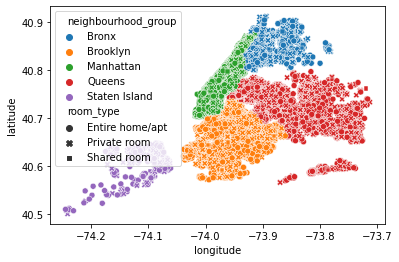

In [22]:
lat= df.latitude
lon= df.longitude
sns.scatterplot(data=df.price, x=lon, y=lat, hue=df.neighbourhood_group, style=df.room_type)

<AxesSubplot:>

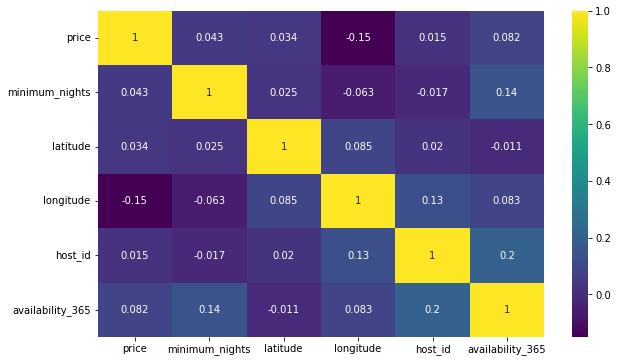

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price','minimum_nights','latitude','longitude','host_id','availability_365']].corr(), annot=True, cmap='viridis')

Sorprendentemente no existe una correlación entre el precio y la ubicación, dependerá del tipo de habitación, la zona y el host el precio de la misma